## EDA

In [1]:
#importamos las librerías necesarias y cargamos los dataset que analizaremos
import pandas as pd
import numpy as np

df_movies = pd.read_csv('ETL\movies_ETL.csv')
df_cast = pd.read_csv('ETL\credits_Cast_ETL.csv')
df_crew = pd.read_csv('ETL\credits_crew_ETL.csv')

In [54]:
# Configurar para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [39]:
#se presume que los id de cada DF es compartido, por lo que se comprovara.
#primero aislamos los id en conjuntos de datos 
movies_ids = set(df_movies['id'])
cast_ids = set(df_cast['id'])
crew_ids = set(df_crew['id'])


In [41]:
#comprovemos si los conjuntos de datos son los mismos
if movies_ids == cast_ids == crew_ids:
    print("Los IDs son los mismos en los tres DataFrames.")
else:
    print("Los IDs no son los mismos en los tres DataFrames.")


Los IDs no son los mismos en los tres DataFrames.


In [45]:
#hacemos una intersepcion entre el conjunto de datos para saber el porcentaje de datos compartidos
interseccion = movies_ids.intersection(cast_ids, crew_ids)

shared_ratio = len(interseccion) / min(len(movies_ids), len(cast_ids), len(crew_ids)) # Calcula la proporción de IDs compartidos entre los DataFrames

print(f'porcentaje de IDs compartidos: {shared_ratio * 100}%')


porcentaje de IDs compartidos: 98.9190571388721%


 dado que el 98% de los id son compartiremos uniremos los DF a partir de ellos, para hacer una exploración más concisa de los datos

In [146]:
union_df= df_movies.merge(df_cast, on='id').merge(df_crew, on='id')
union_df.head() #nos damos cuenta que el id (y otros datos asociados) se repitio, dado que es una caracteristica de los otros df casrt y crew, por lo que para algunas consultas

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,character,name_x,job,name_y,department
0,Toy Story Collection,30000000,"Animation, Comedy, Family",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,English,Released,NaN,Toy Story,7.7,5415.0,1995,12.451801,Woody (voice),Tom Hanks,Director,John Lasseter,Directing
1,Toy Story Collection,30000000,"Animation, Comedy, Family",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,English,Released,NaN,Toy Story,7.7,5415.0,1995,12.451801,Buzz Lightyear (voice),Tim Allen,Director,John Lasseter,Directing
2,Toy Story Collection,30000000,"Animation, Comedy, Family",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,English,Released,NaN,Toy Story,7.7,5415.0,1995,12.451801,Mr. Potato Head (voice),Don Rickles,Director,John Lasseter,Directing
3,Toy Story Collection,30000000,"Animation, Comedy, Family",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,English,Released,NaN,Toy Story,7.7,5415.0,1995,12.451801,Slinky Dog (voice),Jim Varney,Director,John Lasseter,Directing
4,Toy Story Collection,30000000,"Animation, Comedy, Family",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,English,Released,NaN,Toy Story,7.7,5415.0,1995,12.451801,Rex (voice),Wallace Shawn,Director,John Lasseter,Directing


In [148]:
# veamos una visión general de la información de los datos
union_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614711 entries, 0 to 614710
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   belongs_to_collection  88004 non-null   object 
 1   budget                 614711 non-null  int64  
 2   genres                 601859 non-null  object 
 3   id                     614711 non-null  int64  
 4   original_language      614664 non-null  object 
 5   overview               606497 non-null  object 
 6   popularity             614711 non-null  float64
 7   production_companies   526685 non-null  object 
 8   production_countries   574869 non-null  object 
 9   release_date           614711 non-null  object 
 10  revenue                614711 non-null  float64
 11  runtime                613104 non-null  float64
 12  spoken_languages       592349 non-null  object 
 13  status                 614438 non-null  object 
 14  tagline                349950 non-nu

In [149]:
# que cantidad de datos nulos hay por cada columna de nuestro df
union_df.isna().sum()

belongs_to_collection    526707
budget                        0
genres                    12852
id                            0
original_language            47
overview                   8214
popularity                    0
production_companies      88026
production_countries      39842
release_date                  0
revenue                       0
runtime                    1607
spoken_languages          22362
status                      273
tagline                  264761
title                         0
vote_average                  0
vote_count                    0
release_year                  0
return                        0
character                 29955
name_x                        0
job                           0
name_y                        0
department                    0
dtype: int64

In [150]:
# estas son las métricas para las variables numéricas, esto nos ayuda a tener una breve idea de la connotación de dichas variables en nuestro df
union_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,6.147110e+05,614711.000000,614711.000000,6.147110e+05,613104.000000,614711.000000,614711.000000,614711.000000,6.147110e+05
mean,1.024499e+07,94574.281558,5.048129,3.281067e+07,102.371092,5.860737,297.041546,1991.260246,8.207060e+02
std,3.013165e+07,109131.816722,11.497137,1.288124e+08,41.582539,1.603658,963.226010,24.557022,8.409511e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1878.000000,0.000000e+00
25%,0.000000e+00,17130.500000,0.746099,0.000000e+00,89.000000,5.300000,6.000000,1977.000000,0.000000e+00
50%,0.000000e+00,45905.000000,2.230313,0.000000e+00,98.000000,6.100000,20.000000,2001.000000,0.000000e+00
75%,2.900000e+06,126277.000000,7.021114,7.023540e+05,112.000000,6.800000,109.000000,2011.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


In [63]:
# veamos el tipo de dato de cada columan
union_df.dtypes

#el tipo de datos "object" generalmente se refiere a una columna que contiene valores de tipo cadena de caracteres (strings)

belongs_to_collection     object
budget                     int64
genres                    object
id                         int64
original_language         object
overview                  object
popularity               float64
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
vote_average             float64
vote_count               float64
release_year               int64
return                   float64
character                 object
name_x                    object
job                       object
name_y                    object
department                object
dtype: object

In [111]:
# cauntas peliculas hay por genero
genre_counts = union_df.drop_duplicates(subset='id')['genres'].value_counts()
genre_counts
# podemos observar que hay peliculas que contienen mas de un genero, sin emabrgo, el genero de Drama aparentemente es el que mas peliculas tiene

Drama                                                  4913
Comedy                                                 3521
Documentary                                            1714
Drama, Romance                                         1291
Comedy, Drama                                          1123
                                                       ... 
Fantasy, Animation, Horror, Action, Science Fiction       1
Animation, Horror, Action                                 1
Adventure, Fantasy, Mystery                               1
Drama, Family, Science Fiction                            1
Action, Mystery, Thriller, Horror                         1
Name: genres, Length: 3991, dtype: int64

# hagamos algo de graficos

In [101]:
import matplotlib.pyplot as plt

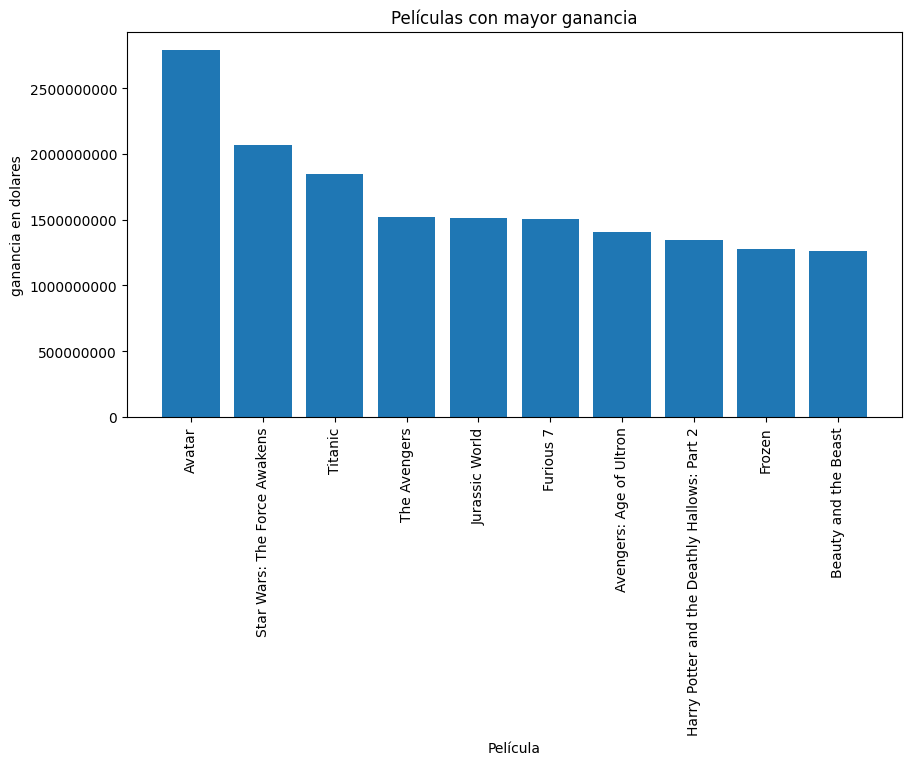

In [107]:
#miremos cual es la pelicula con mas ganancias
# Ordenar el DataFrame por la columna 'revenue' en orden descendente
df_ordenado = union_df.drop_duplicates(subset='id').sort_values(by='revenue', ascending=False)

# Seleccionar las primeras N filas (por ejemplo, las 10 primeras películas)
df_top = df_ordenado.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(df_top['title'], df_top['revenue'])
plt.xticks(rotation=90)
plt.xlabel('Película')
plt.ylabel('ganancia en dolares')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Películas con mayor ganancia')
plt.show()


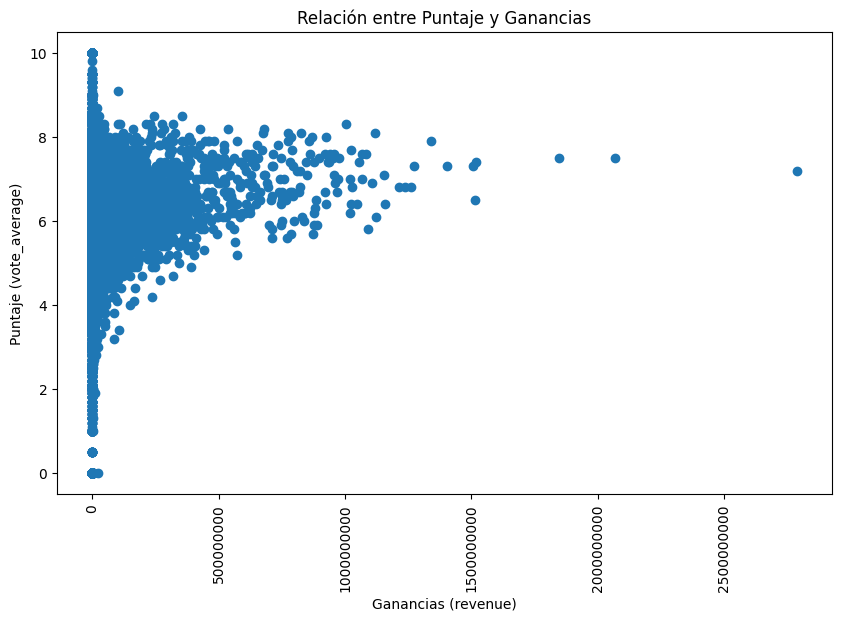

In [127]:
# miremos la votacion de la pelicula vs sus ganancia 
data = union_df.drop_duplicates(subset='id')[['vote_average', 'revenue']]
data.isnull().sum() #verificamos que no haya nulos

plt.figure(figsize=(10, 6))
plt.scatter(data['revenue'], data['vote_average'])
plt.xlabel('Ganancias (revenue)')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('Puntaje (vote_average)')
plt.title('Relación entre Puntaje y Ganancias')
plt.show()

#vemos que necesaria,memte un mayor puntaje no es proporcional a mayor aganncia

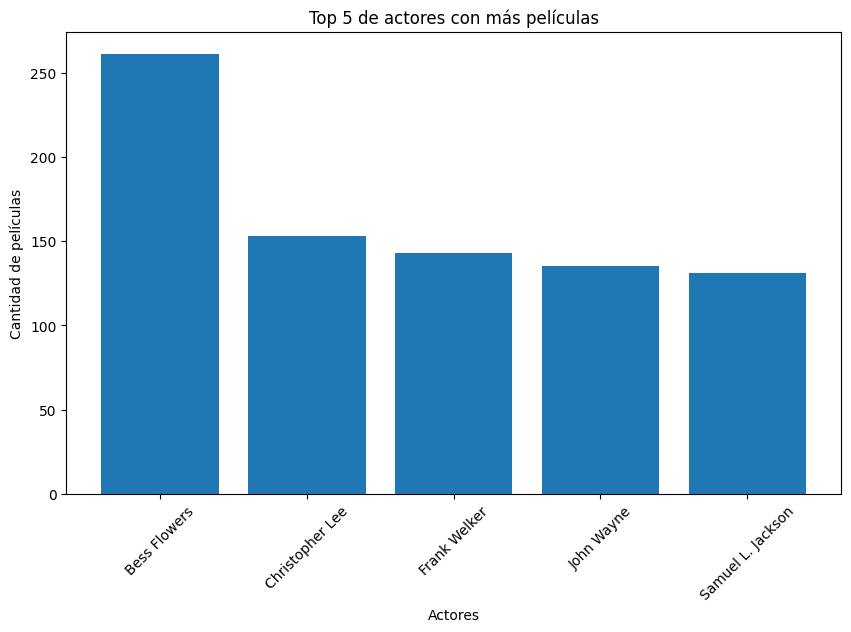

In [130]:
#top 5 de actores que particiapron en mas peliculas
acotres = union_df['name_x'].value_counts() #cuenta cuantas veces aparece un valor en la columna name_x, la cual hace referencia al nombre de los actores
top_actores = acotres.head(5) #sacamos el top 5
#armemo la figura
plt.figure(figsize=(10, 6))
plt.bar(top_actores.index, top_actores.values)
plt.xlabel('Actores')
plt.ylabel('Cantidad de películas')
plt.title('Top 5 de actores con más películas')
plt.xticks(rotation=45)
plt.show()

# Bess Flowers es el actor con mas participaciones en filmaciones

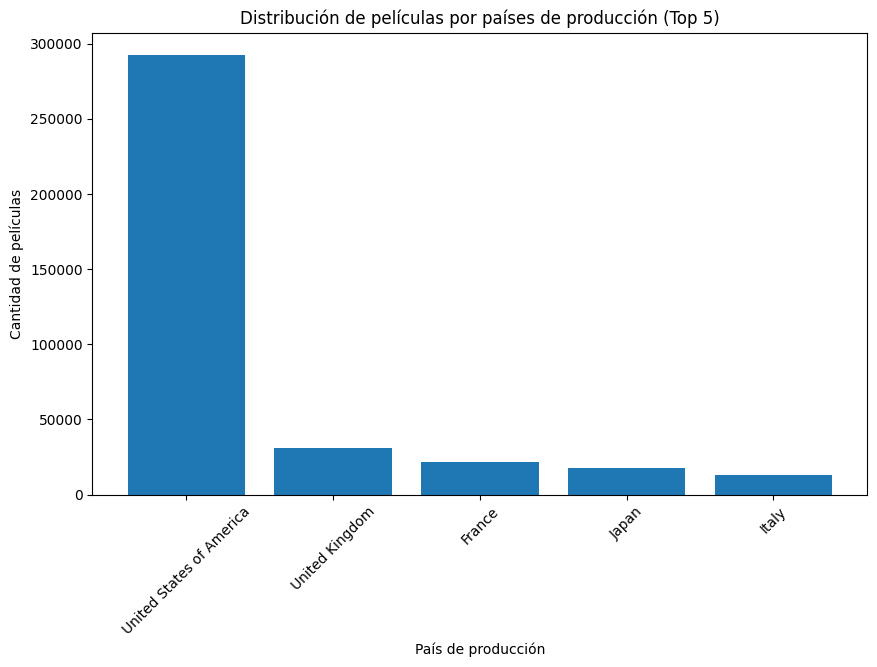

In [137]:
#top 5 de paises con mayor produccion de peliculas
paises = union_df['production_countries'].value_counts()
top_paises = paises.head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_paises.index, top_paises.values)
plt.xlabel('País de producción')
plt.ylabel('Cantidad de películas')
plt.title('Distribución de películas por países de producción (Top 5)')
plt.xticks(rotation=45)
plt.show()

#podemos ver que los estados unidos son los mayores productores de pelicula

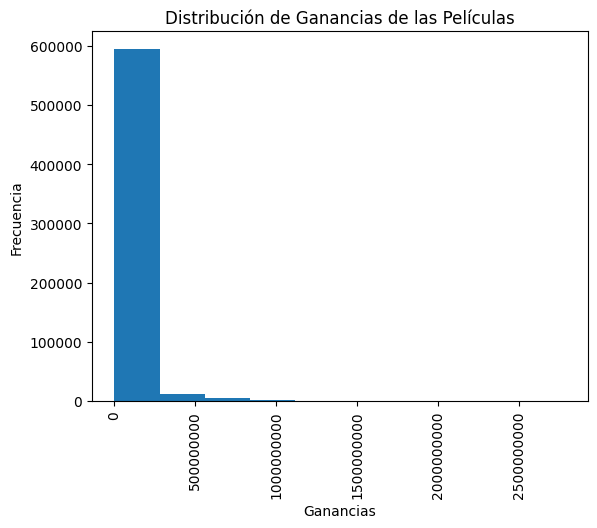

In [176]:
# Crear el histograma para ver la frecuencia de la ganancia de las peliculas
plt.hist(union_df['revenue'], bins=10)
# Personalizar el histograma
plt.xlabel('Ganancias')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ganancias de las Películas')
# Mostrar el histograma
plt.show()

#podemos observar que hay mas pelicuas con una ganancia baja que con una ganancia alta

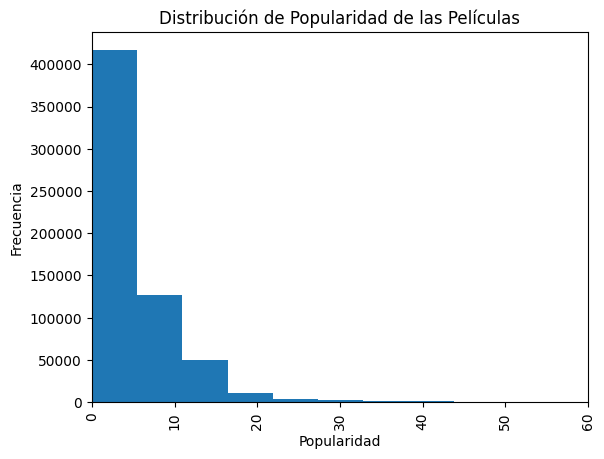

In [174]:
# hagamos otro histograma para ver la freceuncia de la popularidad de la pelicula
plt.hist(union_df['popularity'], bins=100)
# Personalizar el histograma
plt.xlabel('Popularidad')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')
plt.title('Distribución de Popularidad de las Películas')
# Establecer límites del eje x
plt.xlim(0, 60)
# Mostrar el histograma
plt.show()

# podemos ver que hay mas peliculas con una baja popularidad.

## hagamos una nube de palabras 

In [177]:
#para esto, tengo un dataset que tiene el titulo y la descripción lematizada de las películas
df_movies_cluster = pd.read_csv('ETL/df_movies_cluster.csv')
df_movies_cluster.head()

,overview_lemmatization_completo,title
0,lead woody andys toy live happily room andys b...,Toy Story
1,sibling judy peter discover enchant board game...,Jumanji
2,family wedding reignites ancient feud nextdoor...,Grumpier Old Men
3,cheat mistreat step woman hold breath wait elu...,Waiting to Exhale
4,george bank recover daughter wedding receive n...,Father of the Bride Part II


In [2]:
#La biblioteca wordcloud proporciona herramientas para visualizar palabras clave o términos más frecuentes en forma de una nube de palabras.
#%pip install wordcloud
from wordcloud import WordCloud

In [186]:
#generamos una nube de palabras apra el titulo
texto_titulo = ' '.join(df_movies_cluster['title'])
titulo_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_titulo)#definimos los parámetros para crear la imagen (ancho, alto y color), a partir del texto creado en la anterior línea de código.

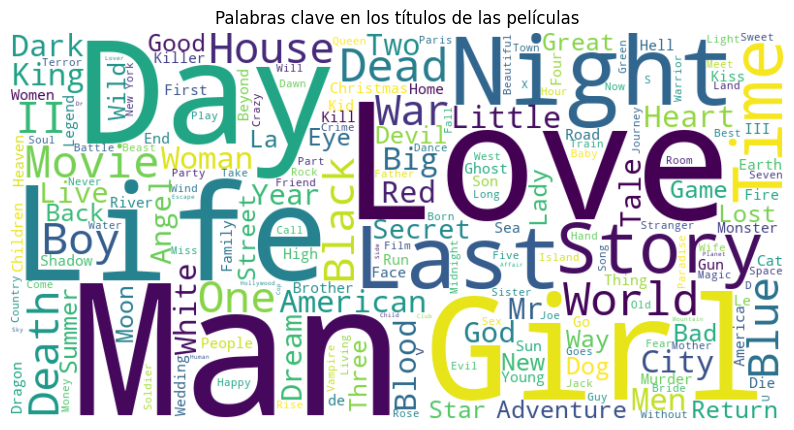

In [187]:
#visualicemos la nube de palabras para los titulo
plt.figure(figsize=(10, 6))
plt.imshow(titulo_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras clave en los títulos de las películas')
plt.show()


In [184]:
#generamos una nube de palabras para la descripción
descripcion_text = ' '.join(df_movies_cluster['overview_lemmatization_completo'].dropna())
descripcion_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descripcion_text)#definimos los parámetros para crear la imagen (ancho, alto y color), a partir del texto creado en la anterior línea de código.
#

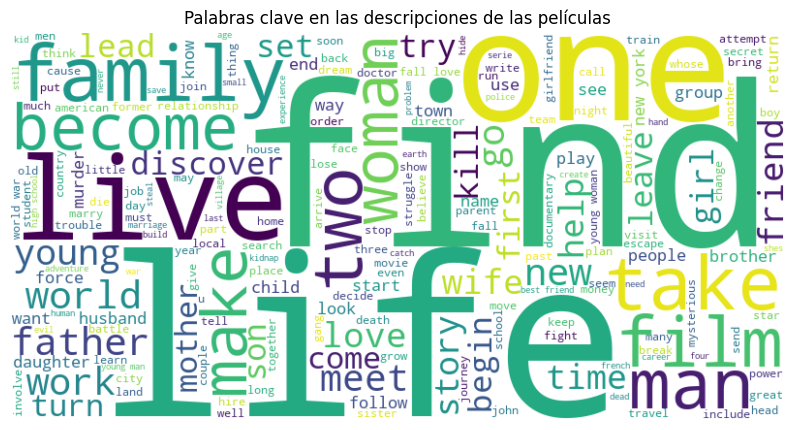

In [185]:
#visualicemos la nube de palabras para las descripciones 
plt.figure(figsize=(10, 6))
plt.imshow(descripcion_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras clave en las descripciones de las películas')
plt.show()
